<a href="https://colab.research.google.com/github/iamafifaah/Google-Colab/blob/main/Projek_Akhir_Nur_Afifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS AKHIR MACHINE LEARNING
### DATA DIRI
#### Nama : Nur Afifah
#### email : nur.afifah.1907226@students.um.ac.id
#### Domisili : Desa Jeruk Gulung, Kecamatan Kandangan, Kabupaten Kediri, Jawa Timur
#### link url profile : https://www.dicoding.com/users/afiifaanur/academies



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

Found 1314 images belonging to 3 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 874 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(3),
    Activation('softmax')
])

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=2,
          validation_data=validation_generator, validation_steps=len(validation_generator))


Epoch 1/2
42/42 [==============================] - 91s 2s/step - loss: 0.2058 - accuracy: 0.9330 - val_loss: 0.1979 - val_accuracy: 0.9291
Epoch 2/2
42/42 [==============================] - 90s 2s/step - loss: 0.1899 - accuracy: 0.9414 - val_loss: 0.1849 - val_accuracy: 0.9519


In [ ]:
model.evaluate(validation_generator, steps=len(validation_generator))


28/28 [==============================] - 17s 616ms/step - loss: 0.1513 - accuracy: 0.9588


[0.15134701132774353, 0.9588100910186768]

In [ ]:
model.save("rockpaperscissors_model_95.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
print(os.getcwd()
)

/content


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# Load model yang telah Anda simpan
model = load_model("rockpaperscissors_model_90.h5")

In [ ]:
# Fungsi untuk memprediksi gambar
def predict_image(file_path):
    img = image.load_img(file_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    class_labels = ['Paper', 'Rock', 'Scissors']
    predicted_class = class_labels[np.argmax(result)]

    return predicted_class

In [ ]:
file_path = "/content/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png"

In [ ]:
predicted_class = predict_image(file_path)
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 68ms/step
Predicted class: Paper


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

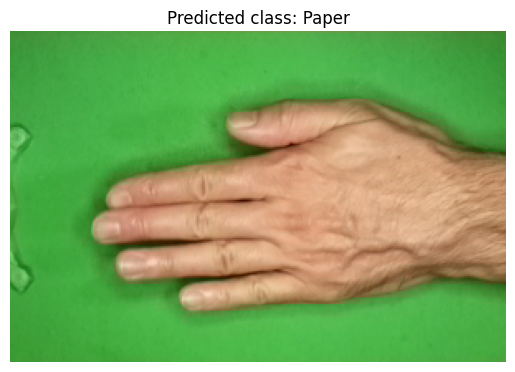

In [ ]:
imgplot = plt.imshow(mpimg.imread(file_path))
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()